<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [12]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [5]:
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']
data = pd.read_csv(dataset_url)

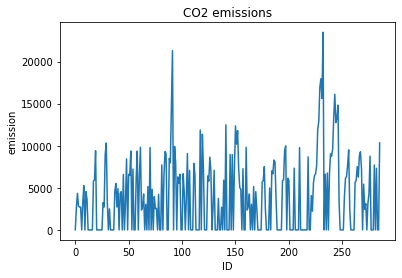

In [14]:
emissions = np.array(data["emission"])

plt.plot(np.arange(emissions.shape[0]), emissions)
plt.title('CO2 emissions')
plt.xlabel('ID')
plt.ylabel('emission')
plt.show()

In [15]:
max_emmision = 0
max_emmisions = emissions
for i in range(emissions.shape[0]):
    max_emmision = max(max_emmision, emissions[i])
    max_emmisions[i] = max_emmision

plt.plot(np.arange(max_emmisions.shape[0]), max_emmisions)
plt.title('CO2 emissions')
plt.xlabel('ID')
plt.ylabel('max emission')
plt.show()

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>